<a href="https://colab.research.google.com/github/NitinVerma2027/PRML-Apr2025/blob/main/ml_ipynb_files/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Preview:
Total available samples: 10000
Training data shape: (8000, 784)
Test data shape: (2000, 784)


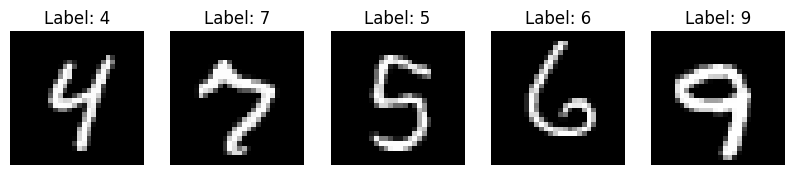

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# File ID from Google Drive
file_id = "1Saukj_bynfqvzqaX2h35HF_RKeXB8so2"
url = f"https://drive.google.com/uc?id={file_id}"

# Read CSV into Pandas DataFrame
df = pd.read_csv(url, header=None)  # No header in the dataset

# Extract labels (first column) and features (remaining columns)
y = df.iloc[:, 0].values  # Labels
X = df.iloc[:, 1:].values  # Features (pixel values)

# Normalize pixel values (0-255 → 0-1)
X = X / 255.0

# Check available dataset size
total_samples = X.shape[0]
print(f"Total available samples: {total_samples}")

# Define split ratios
train_ratio = 0.8  # Use 80% for training, 20% for testing
train_size = int(total_samples * train_ratio)
test_size = total_samples - train_size  # Remaining for testing

# Split dataset while maintaining class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_size, test_size=test_size, stratify=y, random_state=42
)

# Verify shapes
print(f"Training data shape: {X_train.shape}")  # Should be around 80% of total samples
print(f"Test data shape: {X_test.shape}")       # Should be around 20% of total samples

# Display some sample images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis("off")

plt.show()


In [8]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize weights and bias
def initialize_parameters(n_features):
    w = np.zeros((n_features, 1))  # Column vector for weights
    b = 0  # Bias
    return w, b

# Compute cost (Log Loss)
def compute_cost(X, y, w, b):
    m = X.shape[0]  # Number of samples
    z = np.dot(X, w) + b  # Linear combination
    y_pred = sigmoid(z)  # Apply sigmoid

    # Clip values to avoid log(0) errors
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)

    # Compute cost (Log Loss)
    cost = (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

# Compute gradients
def compute_gradients(X, y, w, b):
    m = X.shape[0]  # Number of samples
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)

    dw = (1 / m) * np.dot(X.T, (y_pred - y))  # Gradient for weights
    db = (1 / m) * np.sum(y_pred - y)  # Gradient for bias

    return dw, db
